### Добрый день.
Вашему вниманию представлено решение задачи по итоговому модулю разведывательный анализ данных.  
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.  
И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам.  
Так же в датасете присутствует переменная-загадка (**studytime, granular**). Необходимо узнать, имеет ли она влияние на успеваемость.  
Для начала загрузим все нужные библиотеки и наш датасет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import math
import scipy.stats as stats

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

df = pd.read_csv("stud_math.xls")

Исходя из условий задачи, дата сет содержит следующие переменные:

1. **school** — аббревиатура школы, в которой учится ученик

2.  **sex** — пол ученика ('F' - женский, 'M' - мужской)

3. **age** — возраст ученика (от 15 до 22)

4. **address** — тип адреса ученика ('U' - городской, 'R' - за городом)

5. **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

6. **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. **schoolsup** — дополнительная образовательная поддержка (yes или no)

17. **famsup** — семейная образовательная поддержка (yes или no)

18. **paid** — дополнительные платные занятия по математике (yes или no)

19. **activities** — дополнительные внеучебные занятия (yes или no)

20. **nursery** — посещал детский сад (yes или no)

21. **studytime, granular**- переменная загадка. Исходя из условий, надо определить имеет она влияние на успеваемость или нет.

21. **higher** — хочет получить высшее образование (yes или no)

22. **internet** — наличие интернета дома (yes или no)

23. **romantic** — в романтических отношениях (yes или no)

24. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень много)

26. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. **absences** — количество пропущенных занятий

29. **score** — баллы по госэкзамену по математике



# Часть 1. Знакомство с данными

In [2]:
print(f"Размер дата сета - {df.shape}")

Размер дата сета - (395, 30)


In [3]:
# -----------------------------------------------------------------------
print("Проверим какие у нас есть столбцы и какой у их тип")
df.info()

Проверим какие у нас есть столбцы и какой у их тип
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    fl

In [4]:
# -----------------------------------------------------------------------
print('Посмотрим более подробнее, сколько изначально пропущенных значений')
null_data_1 = df.isnull().sum()
null_data_1[null_data_1 > 0]

Посмотрим более подробнее, сколько изначально пропущенных значений


address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [5]:
print("А теперь взглянем на наш датасет, выведем первые 10 строк")
df.head(10)

А теперь взглянем на наш датасет, выведем первые 10 строк


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Проверим датасет на наличие пустых значений.

In [6]:
#  Для начала получим список столбцов, которые имеют тип object
object_col = [] 
for i in df:
    if df[i].dtypes == "object": object_col.append(i)

In [7]:
#-----------------------------------------------------------------------
# Преобразовываем все пустые значение и None
for i in object_col:
    df[i] = df[i].apply(lambda x: None if str(x).split() == "" else
                        None if str(x).lower() == "Nan" else x)

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [9]:
print("Проверим сколько пропущенных значений стало")
null_data_2 = df.isnull().sum()
null_data_2[null_data_2 > 0]

Проверим сколько пропущенных значений стало


address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Явным образом видно, что у нас нету столбцов где пропуски составляют более 40% от данных.

Узнаем, сколько строк у нас имеют хотя бы один пропуск.

In [10]:
df[df.isnull().any(axis=1)].shape

(298, 30)

298 строк из 395 содержать пустые значение... Мы не можем себе позволить необдуманно удалить все строки где есть хотя бы один пропуск...

In [11]:
# -----------------------------------------------------------------------
print("Проверим, увеличилось ли количество пустых ячеек ")
null_data_2 - null_data_1

Проверим, увеличилось ли количество пустых ячеек 


school                 0
sex                    0
age                    0
address                0
famsize                0
Pstatus                0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
studytime, granular    0
higher                 0
internet               0
romantic               0
famrel                 0
freetime               0
goout                  0
health                 0
absences               0
score                  0
dtype: int64

Ничего не изменилось... Нам повезло с данными :)

# Раздел 2. Смотрим распределение признака для числовых переменным, устраняем выбросы.

Прибегнем к инфо, что бы посмотреть какие числовые данные используются.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Выше можно увидеть, что используется только два типа числовых данные - int64 и float64.  
Напишем маленькой код, который автоматически соберет название колонок для нас.

In [13]:
# -----------------------------------------------------------------------
numeric_col = []
for i in df:
    if df[i].dtypes == "int64" or df[i].dtypes == "float64":
        numeric_col.append(i)

Посмотрим на результат. 

In [14]:
numeric_col

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'studytime, granular',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

Так же создадим функцию, чтобы одной строкой кода выводить все графики и числовые значения.
В связи с тем, что мы работаем только со смешанными типами переменными, воспользуемся графиком countplot.

In [15]:
# -----------------------------------------------------------------------
def look_at_col(df, col_name):
    '''Данная функция принимает в качестве аргументов датасет и название
    колонки в str формате, и возвращает уникальные значение, моду,
    так же гистограмму и discribe по отношению к указанному столбцу
    '''

    print(f"Анализируем столбец {col_name} ")
    print(f"Уникальные значения : {df[col_name].unique()}")
    print("---------------------------------------------------------")
    print(f"Кол-во нулевых значений {df[col_name].isnull().sum()} ")
    print("Мода -", df[col_name].mode())
    print(df[col_name].describe())
    
    ax = sns.countplot(x=col_name, data=df)
    plt.title(f'Гистограмма к столбцу {col_name}')
    plt.ylabel("Количество")
    ax.tick_params(axis='x', labelrotation=90)

Анализируем столбец age 
Уникальные значения : [18 17 15 16 19 22 20 21]
---------------------------------------------------------
Кол-во нулевых значений 0 
Мода - 0    16
dtype: int64
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


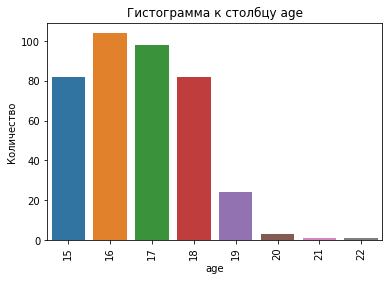

In [16]:
look_at_col(df, numeric_col[0])

Условие к столбцу:  
age — возраст ученика (от 15 до 22).  

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
В выборке большая половина учащихся в возрасте от 15 до 17 лет.

### Анализируем столбец Medu.

Анализируем столбец Medu 
Уникальные значения : [ 4.  1.  3.  2. nan  0.]
---------------------------------------------------------
Кол-во нулевых значений 3 
Мода - 0    4.0
dtype: float64
count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


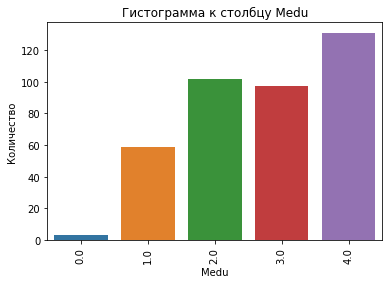

In [17]:
look_at_col(df, numeric_col[1])

Вспоминаем условие.   
Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
У большинства матерей образование высшее. Весьма интересно, что матерей с неполным высшим образованием больше, чем с средне специальное образованием.


### Анализируем столбец Fedu.

Анализируем столбец Fedu 
Уникальные значения : [ 4.  1.  2.  3. 40. nan  0.]
---------------------------------------------------------
Кол-во нулевых значений 24 
Мода - 0    2.0
dtype: float64
count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64


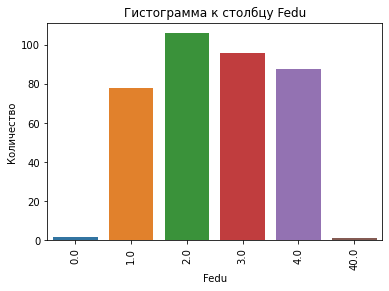

In [18]:
look_at_col(df, numeric_col[2])

Условие к столбцу:  
Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  

Сразу видим выбросы. У нас появились значение равное 40, что противоречит нашему условию.  
Взглянем на выбросы подробнее

In [19]:
df[df.Fedu > 4]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


Обнаружен 1 выброс. Скорее всего кто-то допустил опечатку и ввели 40 вместо 4.  
Удалим данный выброс. 

In [20]:
df = df.drop(df[df.Fedu > 4].index)

Анализируем столбец Fedu 
Уникальные значения : [ 4.  1.  2.  3. nan  0.]
---------------------------------------------------------
Кол-во нулевых значений 24 
Мода - 0    2.0
dtype: float64
count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64


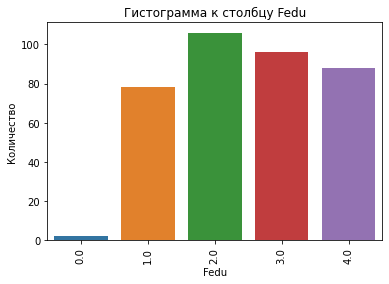

In [21]:
look_at_col(df, numeric_col[2])

Вывод:  
Отметим, что в данной выборке образование у мужчин ниже чему у женщин.

### Анализируем столбец traveltime.

Анализируем столбец traveltime 
Уникальные значения : [ 2.  1.  3. nan  4.]
---------------------------------------------------------
Кол-во нулевых значений 28 
Мода - 0    1.0
dtype: float64
count    366.000000
mean       1.434426
std        0.690297
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


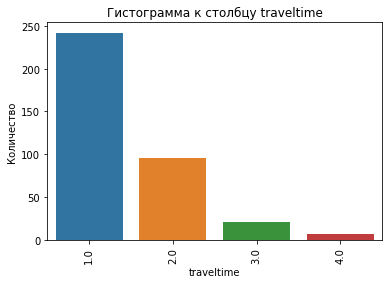

In [22]:
look_at_col(df, numeric_col[3])

Условие к столбцу:  
traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Вывод:
В соответствии с условием, выбросы не обнаружены.  
На графике видно, что в выборке много учеников живут в относительной близости от школы.

### Анализируем столбец studytime.

Анализируем столбец studytime 
Уникальные значения : [ 2.  3.  1. nan  4.]
---------------------------------------------------------
Кол-во нулевых значений 7 
Мода - 0    2.0
dtype: float64
count    387.000000
mean       2.036176
std        0.841744
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


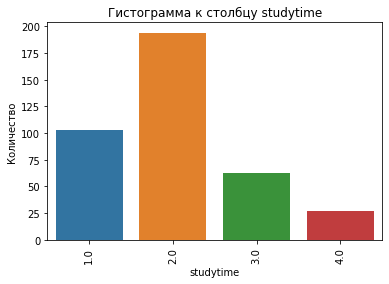

In [23]:
look_at_col(df, numeric_col[4])

Условие к столбцу:  
**studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)


Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Заметно, что в среднем ученики в выборке проводят от 2 до 5 часов на дополнительную учебу.  
А так же, среднее значение равно медиане и моде.

### Анализируем столбец failures.

Анализируем столбец failures 
Уникальные значения : [ 0.  3. nan  2.  1.]
---------------------------------------------------------
Кол-во нулевых значений 22 
Мода - 0    0.0
dtype: float64
count    372.000000
mean       0.338710
std        0.743929
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


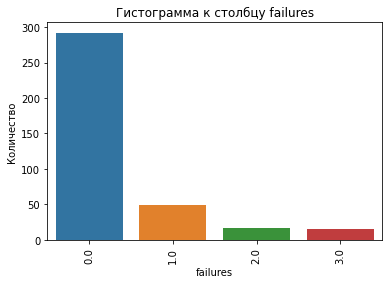

In [24]:
look_at_col(df, numeric_col[5])


Условие к столбцу:  
**failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)  

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Почти все ученики в выборке имеют более 3 неудач.  

Вероятность, что количество неудач в 15-летнем возрасте равно 0, стремиться к 0. Поэтому для правильного корреляционного анализа заменим все значения 0 на 4 и назовем её, как количество неудач больше 3.   

In [25]:
df[numeric_col[5]] = df[numeric_col[5]].apply(lambda x: 4 if x == 0 else x)

### Анализируем столбец granular.

Анализируем столбец studytime, granular 
Уникальные значения : [ -6.  -9.  -3.  nan -12.]
---------------------------------------------------------
Кол-во нулевых значений 7 
Мода - 0   -6.0
dtype: float64
count    387.000000
mean      -6.108527
std        2.525231
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64


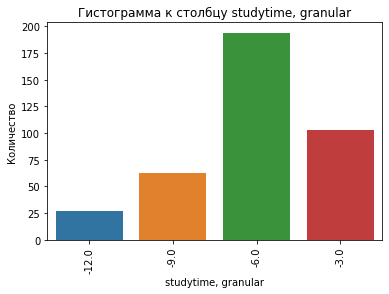

In [26]:
look_at_col(df, numeric_col[6])

Условие к столбцу:      
**studytime, granular**- переменная загадка. Исходя из условий, надо определить имеет она влияние на успеваемость или нет.  

Вывод:  
В данном случаи в условии не указано какие значения могут примать значения.  
Давайте к данному методу построим дополнительный график - ящик с усами.

<AxesSubplot:xlabel='studytime, granular'>

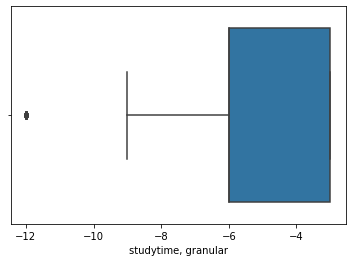

In [27]:
sns.boxplot(x=numeric_col[6], data=df)

Как видно из графика, значение -12 выходит за границу межквартильного размаха. Однако учитывая что таких значений около 25 можно предположить что это тоже номинативная переменная. 

Вывод: Выбросы не обнаружены.

### Анализируем столбец famrel.

Анализируем столбец famrel 
Уникальные значения : [ 4.  5.  3. nan -1.  2.  1.]
---------------------------------------------------------
Кол-во нулевых значений 27 
Мода - 0    4.0
dtype: float64
count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


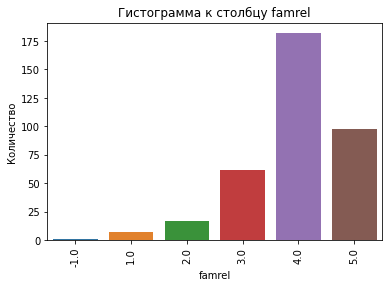

In [28]:
look_at_col(df, numeric_col[7])

Условие к столбцу:
    
**famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

В соответствии с условием, выбросы все значение ниже 1.

In [29]:
df = df.drop(df[df.famrel < 0].index)

Проверим столбец ещё раз.

Анализируем столбец famrel 
Уникальные значения : [ 4.  5.  3. nan  2.  1.]
---------------------------------------------------------
Кол-во нулевых значений 27 
Мода - 0    4.0
dtype: float64
count    366.000000
mean       3.948087
std        0.891380
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


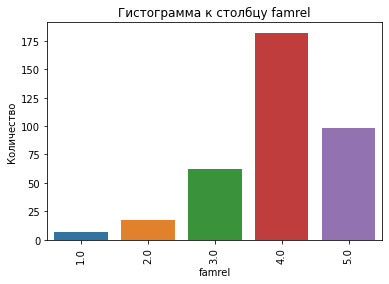

In [30]:
look_at_col(df, numeric_col[7])

Вывод:

Согласно нашему 25 квантилю, более 75 % учеников имеют 3-(нормальное) и выше показатель отношения в семье.

### Анализируем столбец freetime.

Анализируем столбец freetime 
Уникальные значения : [ 3.  2.  4.  1.  5. nan]
---------------------------------------------------------
Кол-во нулевых значений 11 
Мода - 0    3.0
dtype: float64
count    382.000000
mean       3.238220
std        0.992521
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


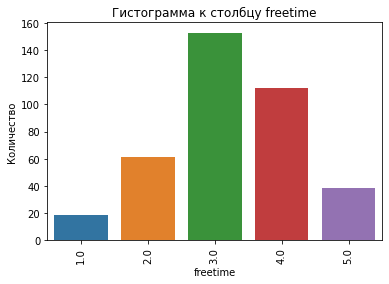

In [31]:
look_at_col(df, numeric_col[8])

Условие к столбцу:  
**freetime** — свободное время после школы (от 1 - очень мало до 5 - очень много)  

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Заметно, что в среднем у учеников в выборке от 3 - среднее и выше показатели свободного времени.
Среднее значение равно медиане и моде.

### Анализируем столбец goout.

Анализируем столбец goout 
Уникальные значения : [ 4.  3.  2.  1.  5. nan]
---------------------------------------------------------
Кол-во нулевых значений 8 
Мода - 0    3.0
dtype: float64
count    385.000000
mean       3.111688
std        1.115933
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


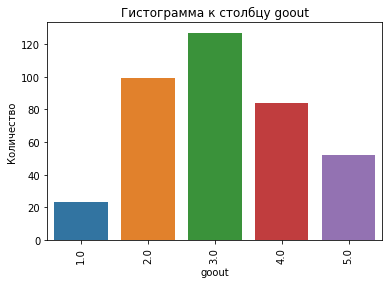

In [32]:
look_at_col(df, numeric_col[9])

Условие к столбцу:  
goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Заметно, что в среднем у учеников в выборке от 3- среднее и выше показатель времени провождения с друзьями.
К слову. График немного напоминает предыдущий. Очевидна зависимость между количеством свободного времени и времени провождения с друзьями. 

### Анализируем столбец health.

Анализируем столбец health 
Уникальные значения : [ 3.  5.  1.  2.  4. nan]
---------------------------------------------------------
Кол-во нулевых значений 15 
Мода - 0    5.0
dtype: float64
count    378.000000
mean       3.526455
std        1.397455
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


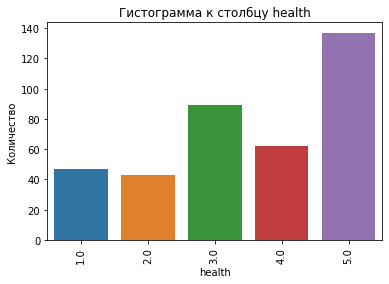

In [33]:
look_at_col(df, numeric_col[10])

Условие к столбцу:    
**health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Согласно медиане и среднему, большинство учеников в выборке имеют нормальные и выше показатели здоровья.  

### Анализируем столбец absences .

Анализируем столбец absences 
Уникальные значения : [  6.   4.  10.   2.   0.  16.  nan   7.   8.  25.  14.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
---------------------------------------------------------
Кол-во нулевых значений 12 
Мода - 0    0.0
dtype: float64
count    381.000000
mean       7.270341
std       23.523737
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


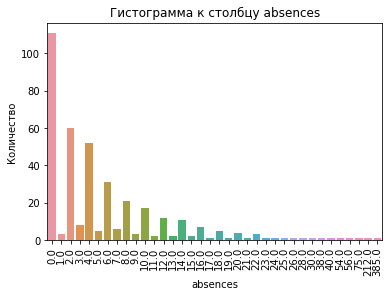

In [34]:
look_at_col(df, numeric_col[11])

Условие к столбцу:
    
absences — количество пропущенных занятий

Наблюдается большой разброс значение. Значений меньше 0 нет. Значит выбросы слева у нас отсутствуют. Выведем ящик с усами, для более детального анализа.


<AxesSubplot:xlabel='absences'>

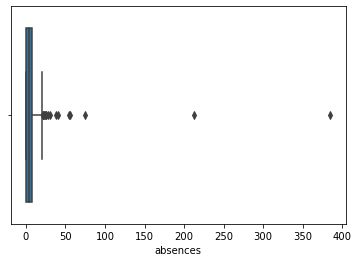

In [35]:
sns.boxplot(x=numeric_col[11], data=df)

как видим. У нас очень сильны выбросы со значением > 200, посмотрим на эти данные.

In [36]:
df[df[numeric_col[11]] > 200]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,4.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


Исходя из исходных условий, нам не известно максимальное число часов занятий в неделю, т.к. такие сильные выбросы могут очень сильно повлияют на наш дальнейший анализ,  предлагаю заменить данные значения на другой максимальный параметр, который мы потом определим. 

Так же следуют отметить, что студент 222 имеет довольно-таки высокие баллы по математике. Возможно, это будущий гений, который пропускает занятия по какой-либо причине.

В связи с тем, что данных у нас и так мало, не хотелось бы удалять просто так данные которые выходят за границы межквартильного размаха. 
Предлагаю посмотреть подробнее глянуть на строки которые попали за межквартальный размах. 

In [37]:
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
IQR = perc75 - perc25
max_IQR = IQR * 1.5
print("Верхняя граница межкватрильного размаха равна ", max_IQR)

Верхняя граница межкватрильного размаха равна  12.0


Анализируем столбец absences 
Уникальные значения : [ 16.  25.  14.  54.  18.  26.  20.  56.  24.  28.  13.  15.  22. 385.
  21.  75.  30.  19.  38.  40.  23.  17. 212.]
---------------------------------------------------------
Кол-во нулевых значений 0 
Мода - 0    14.0
dtype: float64
count     50.000000
mean      32.620000
std       58.775911
min       13.000000
25%       14.250000
50%       18.000000
75%       22.750000
max      385.000000
Name: absences, dtype: float64


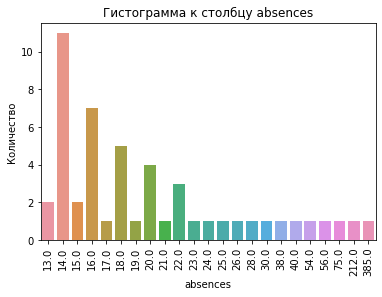

In [38]:
look_at_col(df[df.absences > 12], numeric_col[11])

Всех учеников которые имеют свыше 40 часов пропусков определим как злостные прогульщики, и объединим их в одну группу и присвоим им значение в 40 часов.

In [39]:
df_2 = df.copy()

In [40]:
df_2.loc[(df_2.absences > 40), "absences"] = 40

Допускаем возможность, что данные верные.  

Вывод.  
Только около 90 человек не имеют пропусков, это всего примерно 30 процентов от всех учеников.


### Анализируем столбец score.

Анализируем столбец score 
Уникальные значения : [ 30.  50.  75.  55.  95.  45.  70.  80.  25.  60.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]
---------------------------------------------------------
Кол-во нулевых значений 6 
Мода - 0    50.0
dtype: float64
count    387.000000
mean      52.273902
std       22.966464
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


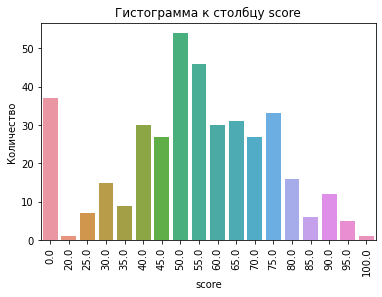

In [41]:
look_at_col(df_2, numeric_col[12])

Условие к столбцу:

**score** — баллы по госэкзамену по математике.

Предполагаем, что максимальный бал по экзамену 100%. В соответствии с данным условием, выбросы не обнаружены.

Вывод:
В целом график похож на график нормально распределения, кроме 0. Как то с трудов вериться что около 10% от выборки набрали всего 0 баллов.


Давайте посмотрим на эти данные.

In [42]:
df_score_zero = df_2[df_2.score == 0]

In [43]:
df_score_zero

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,4.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,4.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,4.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,4.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,4.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


Все данные значения помечаем как выбросы, т.к. у всех данных признаков одинаковые показатели в столбцах absences, famsize и Pstatus так же почти одинаковые показатели school.
В связи с выше изложенным, данный показатель будет негативно влиять на алгоритмы дальнейшего обучения.

В целом это выборка, требует отдельного анализа и уточнения условий задачи.  
Так же удалим все NaN значения. т.к. на таких записях модель не сможет обучиться. По сути они бесполезные.

In [44]:
df_3 = df_2[df_2.score > 0].copy()

Отметим, что при данном способе удаления данных, так же удаляться все Nan значения. 

# Раздел 3. Корреляционный анализ количественных переменных

Для анализа выведем графики и значения кореляций.

In [45]:
cor_matr = df_3.corr()

In [46]:
cor_matr

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.127411,-0.126262,0.104695,-0.009031,-0.238928,0.009031,0.074120,-0.001622,0.119106,-0.053539,0.243656,-0.133221
Medu,-0.127411,1.000000,0.610995,-0.163279,0.070684,0.148522,-0.070684,-0.011290,0.015757,0.076565,-0.034962,0.058626,0.185018
Fedu,-0.126262,0.610995,1.000000,-0.157956,-0.017564,0.159491,0.017564,-0.027716,-0.027575,0.046972,0.019059,0.036833,0.133649
traveltime,0.104695,-0.163279,-0.157956,1.000000,-0.113372,-0.044571,0.113372,-0.046098,-0.016865,0.034903,-0.000732,-0.025501,-0.079383
studytime,-0.009031,0.070684,-0.017564,-0.113372,1.000000,0.107627,-1.000000,0.041233,-0.130168,-0.030210,-0.083250,-0.081297,0.138439
failures,-0.238928,0.148522,0.159491,-0.044571,0.107627,1.000000,-0.107627,-0.014895,-0.090675,-0.142624,-0.111963,-0.293666,0.227683
"studytime, granular",0.009031,-0.070684,0.017564,0.113372,-1.000000,-0.107627,1.000000,-0.041233,0.130168,0.030210,0.083250,0.081297,-0.138439
famrel,0.074120,-0.011290,-0.027716,-0.046098,0.041233,-0.014895,-0.041233,1.000000,0.154119,0.039546,0.119492,-0.075128,0.029613
freetime,-0.001622,0.015757,-0.027575,-0.016865,-0.130168,-0.090675,0.130168,0.154119,1.000000,0.291143,0.078495,-0.029540,-0.015933
goout,0.119106,0.076565,0.046972,0.034903,-0.030210,-0.142624,0.030210,0.039546,0.291143,1.000000,-0.006226,0.063699,-0.185977


<AxesSubplot:>

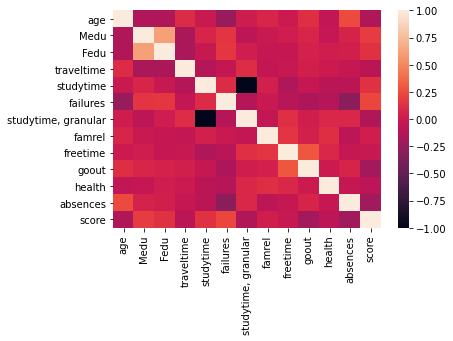

In [47]:
sns.heatmap(cor_matr)

в связи с относительно невысокой корреляцией определим, что 14% будет являться пороговым значением.  
Отсортируем все наши значения и выведем их.  
График получился слишком большой и нечитаемый, отсортируем интересующие нас значения.

Создадим код, для вывода информации в более читаемом виде.

In [48]:
def print_res(cor_matr):
    ''' Код сортирует столбцы которые коррелируются более чем 0,14 
    и выводит их на экран. Код на вход принимает матрицу корреляции'''

    cor_dict = {}
    for y in range(len(numeric_col)):
        cor_dict[numeric_col[y]] = {}
        for x in range(len(numeric_col)):
            if y != x:
                if abs(cor_matr.iloc[y][x]) > 0.14:
                    cor_dict[numeric_col[y]][numeric_col[x]
                                             ] = cor_matr.iloc[y][x]

    for x in cor_dict:
        print(f"Столбец {x} корелируеться  c")
        print(cor_dict[x])
        print()

Теперь выведем полученный результат

In [49]:
print_res(cor_matr)

Столбец age корелируеться  c
{'failures': -0.2389278600048591, 'absences': 0.24365602228889216}

Столбец Medu корелируеться  c
{'Fedu': 0.6109948741322937, 'traveltime': -0.1632793601300975, 'failures': 0.1485217449495198, 'score': 0.18501842960302256}

Столбец Fedu корелируеться  c
{'Medu': 0.6109948741322937, 'traveltime': -0.1579558238524197, 'failures': 0.1594908117206338}

Столбец traveltime корелируеться  c
{'Medu': -0.1632793601300975, 'Fedu': -0.1579558238524197}

Столбец studytime корелируеться  c
{'studytime, granular': -1.0000000000000002}

Столбец failures корелируеться  c
{'age': -0.2389278600048591, 'Medu': 0.1485217449495198, 'Fedu': 0.1594908117206338, 'goout': -0.1426243246845965, 'absences': -0.29366632990446695, 'score': 0.2276831656391304}

Столбец studytime, granular корелируеться  c
{'studytime': -1.0000000000000002}

Столбец famrel корелируеться  c
{'freetime': 0.15411856423069123}

Столбец freetime корелируеться  c
{'famrel': 0.15411856423069123, 'goout': 0.2911

Выводы по разделу:

Видно, что с возрастом (Столбец age), ученики прогуливают больше (absences) и совершают больше ошибок(failures).

Так же высокая корреляция у переменных Medu и Fedu. Можно сделать вывод, что чем более образованные человек, тем более образованную пару он будет себе искать. Однако значение Medu коррелируется с итоговой оценкой на экзамене (score) намного лучше, чем Fedu. Исходя из этого можно предположить, что обучением детей больше занимается мать чем отец. Так же более образованные родители живут ближе к школе. Видимо это связано с тем, что более образованные люди живут в городе, где есть школы, а менее образованные более больше заняты в сельском хозяйстве и соответственно проживают за городом. Так же у более образованных отцов ученики допускают больше ошибок. Опять же это можно связать с воспитанием детей, т.к. более образованные родители чаще будут отдавать своих детей в разные кружки, и давать детям больше пробовать делать что-то новое. 

Так же отмечаем, что свободное время(freetime) так же коррелируется с временим проведенными с друзьями(goout) и с семейными отношениями (famrel). Значит, чем больше свободного времени у ученика, тем больше он проводит времени с друзьями. И тем более у его благоприятная обстановка в семье.

Столбцы studytime, granular и studytime обратно скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная studytime, granular.  

Столбец health значимо не скоррелирован ни с одним из других столбцов. 

В конце ещё раз отметим, что итоговая переменная (score) более скоррелирована только с образованием матери, и с количеством внеучебных неудач. Как мы отмечали ранее, матери больше занимаются чем отцы, а количество внеучебных неудач учит преодолевать трудности, и учебные неудачи в том числе. А также вспомним крылатое выражение " На ошибках учатся". Так же присутствует обратная корреляция к столбцам goout, и absences. В целом тоже логично, что чем больше пропусков, тем хуже ученик учиться. И Количество учебных часов тоже влияет на итоговую оценку по математике.


# Раздел 4. Анализи номинативных переменных

Возвращаемся к списку object_col который хранит в себе название столбцов, имеющие тип Object, создадим функцию, которая будет выводить нам ящик с усами для каждой переменной. И проверим данные на выбросы.

In [50]:
def get_boxplot(df, column):
    ''' Данный код выдает ящик с усами и описательную статистику
    по результатам итогового экзамена в зависимости от столбца.
    На вход принимает df (датасет), и имя столбца (column)
    '''

    print(f"Анализируем столбец {column}")
    print(f"Уникальные значения: ")
    print(f"Кол-во нулевых значений: {df[column].isnull().sum()}")
    print(df[column].unique())

    sns.boxplot(x=column, y='score', data=df)
    plt.title(f'Ящик с усами к столбцу {column}')
    plt.ylabel('Итоговые результаты за экзамен')

Так же создадим отдельный список столбцов, в который будем заносить результаты, которые нам покажутся странными.

In [51]:
strange_col = []

### Анализируем столбец school.

Анализируем столбец school
Уникальные значения: 
Кол-во нулевых значений: 0
['GP' 'MS']


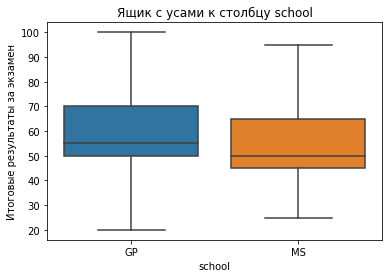

In [52]:
get_boxplot(df_3, object_col[0])

Условие к столбцу:  
school — аббревиатура школы, в которой учится ученик  

Вывод:  
В соответствии  с условием, выбросы не обнаружены.  
Судя по графику, ученики получают более высокие балы в GP.

### Анализируем столбец sex.

Анализируем столбец sex
Уникальные значения: 
Кол-во нулевых значений: 0
['F' 'M']


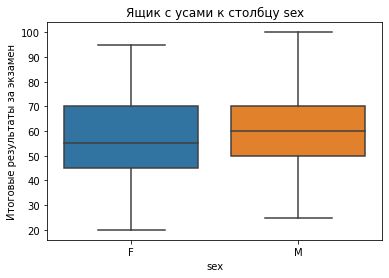

In [53]:
get_boxplot(df_3, object_col[1])

Условие к столбцу:  
sex — пол ученика ('F' - женский, 'M' - мужской)  

Вывод:  
В соответствии  с условием, выбросы не обнаружены.  
Судя по графику, ученики - мужчины получают чуть чуть более высокие балы на экзамене.

### Анализируем столбец address.

Анализируем столбец address
Уникальные значения: 
Кол-во нулевых значений: 14
['U' nan 'R']


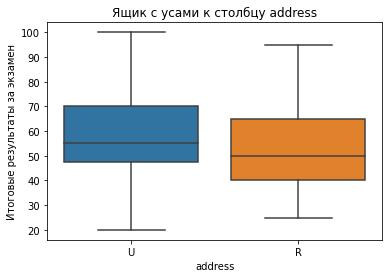

In [54]:
get_boxplot(df_3, object_col[2])

Условие к столбцу:   
address — тип адреса ученика ('U' - городской, 'R' - за городом)

Вывод:  
В соответствии  с условием, выбросы не обнаружены.  
Судя по графику, городские получают более высокий был чем ученики которые живут за городом.

### Анализируем столбец famsize.

Анализируем столбец famsize
Уникальные значения: 
Кол-во нулевых значений: 24
[nan 'GT3' 'LE3']


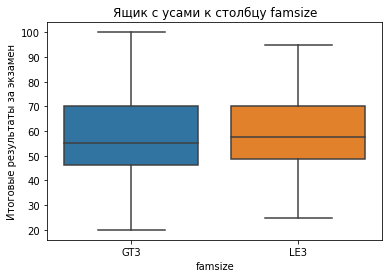

In [55]:
get_boxplot(df_3, object_col[3])

Условие к столбцу:  
famsize — размер семьи('LE3' <= 3, 'GT3' >3)  

Вывод:  
В соответствии  с условием, выбросы не обнаружены.  
Судя по графику, столбец не влияет на баллы набранные экзамене.

### Анализируем столбец Pstatus.

Анализируем столбец Pstatus
Уникальные значения: 
Кол-во нулевых значений: 39
['A' nan 'T']


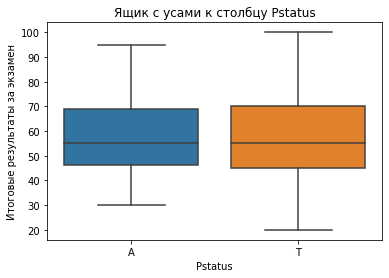

In [56]:
get_boxplot(df_3, object_col[4])

Условие к столбцу:  
Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)  

Вывод:  
В соответствии  с условием, выбросы не обнаружены.  
Судя по графику, столбец не влияет на баллы набранные экзамене.

### Анализируем столбец Mjob.

Анализируем столбец Mjob
Уникальные значения: 
Кол-во нулевых значений: 17
['at_home' 'health' 'other' 'services' 'teacher' nan]


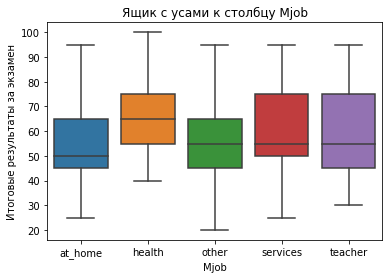

In [57]:
get_boxplot(df_3, object_col[5])

Условие к столбцу:  
Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец незначительно влияет на баллы набранные на экзамене.

### Анализируем столбец Fjob.

Анализируем столбец Fjob
Уникальные значения: 
Кол-во нулевых значений: 32
['teacher' 'other' nan 'health' 'services' 'at_home']


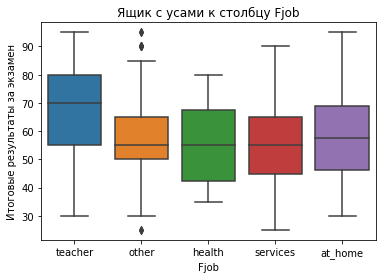

In [58]:
get_boxplot(df_3, object_col[6])

Условие к столбцу:  
Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) 

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец незначительно влияет на баллы набранные на экзамене.

### Анализируем столбец reason.

Анализируем столбец reason
Уникальные значения: 
Кол-во нулевых значений: 15
['course' 'other' 'home' 'reputation' nan]


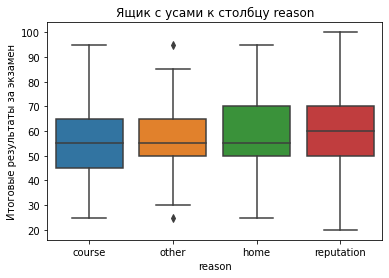

In [59]:
get_boxplot(df_3, object_col[7])

Условие к столбцу:  
reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец не влияет на баллы набранные на экзамене.

### Анализируем столбец guardian.

Анализируем столбец guardian
Уникальные значения: 
Кол-во нулевых значений: 29
['mother' 'father' 'other' nan]


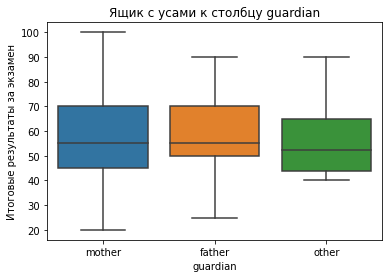

In [60]:
get_boxplot(df_3, object_col[8])

Условие к столбцу:  
guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)  

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец незначительно влияет на баллы набранные на экзамене.

### Анализируем столбец schoolsup.

Анализируем столбец schoolsup
Уникальные значения: 
Кол-во нулевых значений: 9
['yes' 'no' nan]


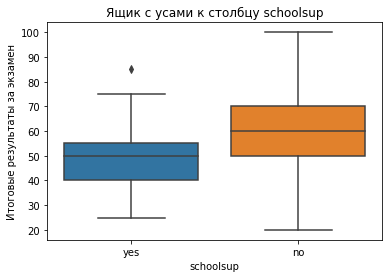

In [61]:
get_boxplot(df_3, object_col[9])

Условие к столбцу:  
schoolsup — дополнительная образовательная поддержка (yes или no)  

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец влияет на баллы, набранные на экзамене.  
Логически, странно что дополнительная образовательная поддержка отрицательно сказывается на баллы, набранные на экзамене.  
В дальнейшем надо будет поэкспериментировать с данным признаком.  
Добавим наименование столбца в наш список странных столбца.

In [62]:
strange_col.append(object_col[9])

### Анализируем столбец famsup.

Анализируем столбец famsup
Уникальные значения: 
Кол-во нулевых значений: 36
['no' 'yes' nan]


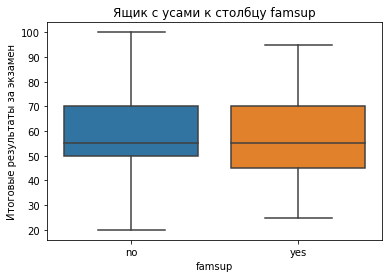

In [63]:
get_boxplot(df_3, object_col[10])

Условие к столбцу:  
famsup — семейная образовательная поддержка (yes или no) 

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец незначительно влияет на баллы, набранные на экзамене.  
Логически, странно что образовательная поддержка отрицательно сказывается на баллы, набранные на экзамене.  
В дальнейшем надо будет поэкспериментировать с данным признаком.  
Добавим наименование столбца в наш список странных столбца.

In [64]:
strange_col.append(object_col[10])

### Анализируем столбец paid.

Анализируем столбец paid
Уникальные значения: 
Кол-во нулевых значений: 36
['no' nan 'yes']


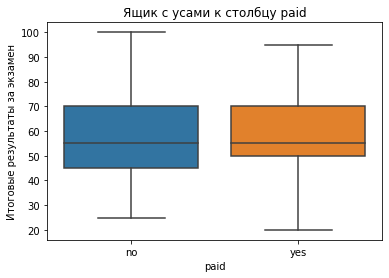

In [65]:
get_boxplot(df_3, object_col[11])

Условие к столбцу:  
paid — дополнительные платные занятия по математике (yes или no)  

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец незначительно влияет на баллы, набранные на экзамене.  
Логически, наличие дополнительных платных занятий отрицательно сказывается на баллы, набранные на экзамене.  
В дальнейшем надо будет поэкспериментировать с данным признаком.  
Добавим наименование столбца в наш список странных столбцов.

In [66]:
strange_col.append(object_col[11])

### Анализируем столбец activities.

Анализируем столбец activities
Уникальные значения: 
Кол-во нулевых значений: 12
['no' 'yes' nan]


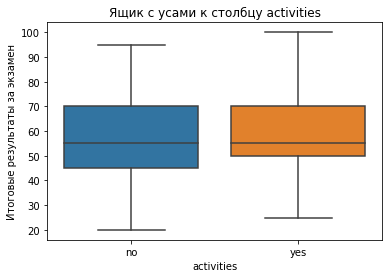

In [67]:
get_boxplot(df_3, object_col[12])

Условие к столбцу:  
paid — дополнительные платные занятия по математике (yes или no)

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец незначительно влияет на баллы, набранные на экзамене.  
Логически, наличие дополнительных платных занятий отрицательно сказывается на баллы, набранные на экзамене.  
В дальнейшем надо будет поэкспериментировать с данным признаком.  
Добавим наименование столбца в наш список странных столбцов.

### Анализируем столбец nursery.

Анализируем столбец nursery
Уникальные значения: 
Кол-во нулевых значений: 12
['yes' 'no' nan]


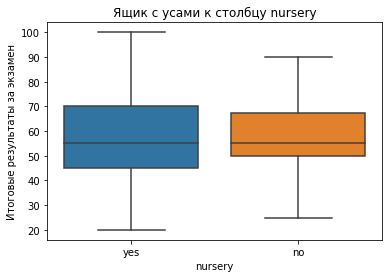

In [68]:
get_boxplot(df_3, object_col[13])

Условие к столбцу:  
nursery — посещал детский сад (yes или no)

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец незначительно влияет на баллы, набранные на экзамене.  

### Анализируем столбец higher.

Анализируем столбец higher
Уникальные значения: 
Кол-во нулевых значений: 19
['yes' nan 'no']


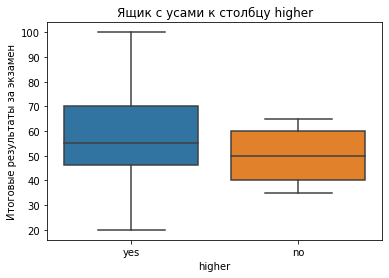

In [69]:
get_boxplot(df_3, object_col[14])

Условие к столбцу:  
higher — хочет получить высшее образование (yes или no)

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец влияет на баллы, набранные на экзамене. 

### Анализируем столбец internet.

Анализируем столбец internet
Уникальные значения: 
Кол-во нулевых значений: 29
[nan 'yes' 'no']


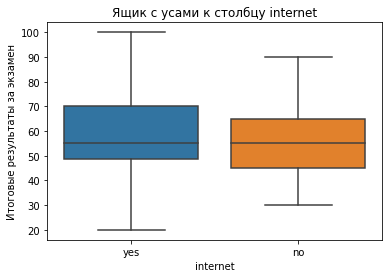

In [70]:
get_boxplot(df_3, object_col[15])

Условие к столбцу:  
internet — наличие интернета дома (yes или no)

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец влияет на баллы, набранные на экзамене. 

### Анализируем столбец romantic.

Анализируем столбец romantic
Уникальные значения: 
Кол-во нулевых значений: 29
['no' nan 'yes']


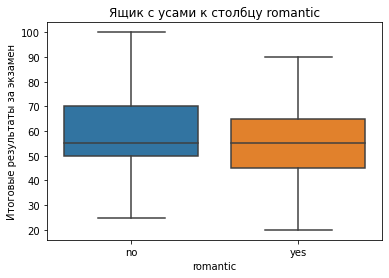

In [71]:
get_boxplot(df_3, object_col[16])

Условие к столбцу:  
romantic — в романтических отношениях (yes или no)

Вывод:  
В соответствии с условием, выбросы не обнаружены.  
Судя по графику, столбец незначительно влияет на баллы, набранные на экзамене. 

# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Anova

In [72]:
#  создадим список, куда поместим все статистически значимые переменные. 
nom_stat_meaningful = []

In [73]:
def get_stat_anova(df, column):
    ''' Код проводит статистический анализ с помощью теста Anova
    на вход принимает df - датасет и column - столбец из таблицы.
    Корреляция происходи на основе столбца score (итоговое значение) '''

    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))

    for comb in combinations_all:
        pvalue_1 = stats.f_oneway(
            df.loc[df.loc[:, column] == comb[0], 'score'], df.loc[df.loc[:, column] == comb[1], 'score']).pvalue
        if pvalue_1 <= 0.05:  # Учли поправку Бонферони
            nom_stat_meaningful.append(column)
            print('Найдены статистически значимые различия для колонки', column)
            break


for i in object_col:
    get_stat_anova(df_3, i)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup


# Вывод по работе.

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

- В данных достаточно мало пустых значений.
    Выбросы найдены только в столбцах с Fedu, famrel и absences. Так же обнаружено какое-то странное распределение в итоговых баллам по математике. Слишком много учеников в выборке набрали 0 баллов. Необходимо уточнить условия по этому столбцу. В целом можно сказать, что данные достаточно чистые.
- Обнаружена положительная корреляция параметров Medu, studytime, failures, goout, absences. Можно говорить, что мама вносить огромный вклад в обучение учеников, количество учебных часов в программе. Количество ошибок помогает студентам стать мудрее. А большое количество проведенного времени с друзьями и отсутствие на занятиях отрицательно влияют на итоговую оценку по математике.
- Столбцы studytime, granular и studytime обратно скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная studytime, granular. 
- Тест Anova указал на следующие статистически значимые колонки: address, Mjob, Fjob, schoolsup.
- При наличии дополнительного времени, запросить дополнительные данные и отдельно изучить влияние колонок famsup, paid, т.к. фактические результаты не соответствуют ожиданиям. Возможно дополнительные платные занятия, семейная образовательная поддержка и дополнительная образовательная поддержка не эффективны, а возможно есть препятствия, которые не позволяют получить должный эффект от вышеуказанной деятельности. 
- Самые важные параметры, которые предлагаю использовать в дальнейшем для построения модели, это company, Medu, studytime, failures, goout, и absences, address, Mjob, Fjob, schoolsup.
